<a href="https://colab.research.google.com/github/anggrainyshinta/Subway_Nutrition/blob/main/Subway_Nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset

All items on Subways's menu as of 2021. This dataset provides nutrition facts of every menu item on the Subway menu.

*   Category = The group or type of each menu item. Categories include Bread & Toppings, Sandwiches, Wraps, Bowls, Salads, Drinks, Breakfast, Panini, and Extras Menu.
*   Items = The specific food items available for consumption.
*   Calories (kCal) = This measures the amount of energy in the food, measured in kCal (kilocalories).
*   Total Fat (g) : Total fat helps you feel satisfied and can protect against heart disease.
*   Saturated Fat (g) : Saturated fat can raise bad cholesterol and triglycerides, increasing the risk for heart disease (although it doesn't need to be avoided entirely).
*   Cholestorel (mg) : Cholesterol helps build cells and produce certain hormones, but too much saturated and trans fat can lead to artery-clogging deposits.
*   Sodium (mg) : Sodium helps lose water weight but can cause fluid retention if consumed excessively.
*   Carbs (g) : Carbs, short for carbohydrates, are the body's main source of energy. It includes sugars and fiber, and fuels essential organs.
*   Dietary Fiber (g) : Dietary fiber is a type of carbohydrate that is not digested by the body. It helps with digestion and can make you feel full.
*   Sugars (g) : Sugars are sweet substances found in food. Natural sugars are in fruits, while added sugars are in processed foods and drinks.
*   Protein (g) : Protein helps the body grow, repair itself, and stay healthy. It can also make you feel full after eating.
*   Weight Watchers Pnts : Weight Watchers Points is a system to help manage weight. It assigns points to foods based on their nutritional value.

source from dataset kaggle : https://www.kaggle.com/datasets/joebeachcapital/subway-nutrition

## Data Preparation

In [1]:
# for basic data processing and graphical presentation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kstest, shapiro

## Problem Statement

Analyzing Subway's nutrition can help us understand the nutritional value of the food available at Subway.

Some issues to consider include:
1. Assessing the overall healthiness of the Subway menu.
2. Identifying menu items with the highest or lowest nutritional content.
3. Analyzing how nutrition differs across menu categories.
4. Determining if there is a correlation between certain nutrients.
5. Creating healthier menu options or food recommendations based on nutritional content.

## Raw Data Preparation

Converts a Google Sheet URL into a URL that can be used to read a CSV file

In [2]:
# Open Google Sheet file
def data_fullset_url(url):
  data_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
  return data_url

In [3]:
#Reading Dataset
data_url = data_fullset_url('https://drive.google.com/file/d/1Hceg0TrRuTvGBKocL8Yz1iQ5O7IMnfFj/view?usp=sharing')
data = pd.read_csv(data_url)
data.head()

,Category,Item,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
0,Sandwiches,BBQ Chicken,330,4.0,1.0,0.0,50,860,50,2,16,24,323.0
1,Sandwiches,BBQ Rib,580,31.0,10.0,0.0,60,1260,54,3,18,21,587.0
2,Sandwiches,Black Forest Ham,260,4.0,1.5,0.0,30,720,42,5,8,18,251.5
3,Sandwiches,Buffalo Chicken,360,12.0,2.0,0.0,55,7710,39,3,5,24,343.0
4,Sandwiches,Chicken & Bacon Ranch,530,26.0,10.0,0.5,100,1100,41,3,6,36,510.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              186 non-null    object 
 1   Item                  186 non-null    object 
 2   Calories              186 non-null    int64  
 3   Total Fat (g)         186 non-null    float64
 4   Saturated Fat (g)     186 non-null    float64
 5   Trans Fat (g)         186 non-null    float64
 6   Cholesterol (mg)      186 non-null    int64  
 7   Sodium (mg)           186 non-null    int64  
 8   Carbs (g)             186 non-null    int64  
 9   Dietary Fiber (g)     186 non-null    int64  
 10  Sugars (g)            186 non-null    int64  
 11  Protein (g)           186 non-null    int64  
 12  Weight Watchers Pnts  185 non-null    float64
dtypes: float64(4), int64(7), object(2)
memory usage: 19.0+ KB


## Data Cleaning

### Check Missing Values

The code provided is calculating and printing the count of null (missing) values for each column

In [5]:
null_counts = data.isnull().sum()
print(null_counts)

Category                0
Item                    0
Calories                0
Total Fat (g)           0
Saturated Fat (g)       0
Trans Fat (g)           0
Cholesterol (mg)        0
Sodium (mg)             0
Carbs (g)               0
Dietary Fiber (g)       0
Sugars (g)              0
Protein (g)             0
Weight Watchers Pnts    1
dtype: int64


### Check Unique Values

The code provided seems to be checking for typos or variations in the values of the 'Category' column

In [6]:
# Checking typos
check = ['Category']

for i in check:
  unique_data = data[i].value_counts()
  print(unique_data,'\n')

Bread & Toppings    49
Sandwiches          42
Wraps               26
Bowls               25
Salads              23
Drinks              11
Breakfast            4
Panini               3
Extras               3
Name: Category, dtype: int64 



This line uses the .fillna() method to replace missing values in the specified column with the value 0.

In [7]:
data.fillna({'Weight Watchers Pnts': 0}, inplace=True)

In [8]:
data.nunique()

Category                  9
Item                    133
Calories                 78
Total Fat (g)            51
Saturated Fat (g)        28
Trans Fat (g)             5
Cholesterol (mg)         36
Sodium (mg)             125
Carbs (g)                58
Dietary Fiber (g)        13
Sugars (g)               25
Protein (g)              50
Weight Watchers Pnts    155
dtype: int64

In [9]:
data.columns

Index(['Category', 'Item', 'Calories', 'Total Fat (g)', 'Saturated Fat (g)',
       'Trans Fat (g)', 'Cholesterol (mg)', 'Sodium (mg)', 'Carbs (g)',
       'Dietary Fiber (g)', 'Sugars (g)', 'Protein (g)',
       'Weight Watchers Pnts'],
      dtype='object')

### Convert Data Types

In [10]:
data = data.astype({"Calories":'float', "Cholesterol (mg)":'float', "Sodium (mg)":'float', "Carbs (g)":'float', "Dietary Fiber (g)":'float', "Sugars (g)":'float', "Protein (g)":'float'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              186 non-null    object 
 1   Item                  186 non-null    object 
 2   Calories              186 non-null    float64
 3   Total Fat (g)         186 non-null    float64
 4   Saturated Fat (g)     186 non-null    float64
 5   Trans Fat (g)         186 non-null    float64
 6   Cholesterol (mg)      186 non-null    float64
 7   Sodium (mg)           186 non-null    float64
 8   Carbs (g)             186 non-null    float64
 9   Dietary Fiber (g)     186 non-null    float64
 10  Sugars (g)            186 non-null    float64
 11  Protein (g)           186 non-null    float64
 12  Weight Watchers Pnts  186 non-null    float64
dtypes: float64(11), object(2)
memory usage: 19.0+ KB


## Data Exploration and Analysis

Provides a summary statistics of the numerical columns


In [12]:
data.describe()

,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,316.612903,14.494624,4.876344,0.155914,51.424731,1028.037634,28.596774,2.844086,6.080645,19.215054,308.301075
std,235.703847,14.284559,5.175125,0.378321,48.390162,1419.398824,23.340113,2.427855,7.727029,15.179182,229.653177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,122.500000,3.500000,1.000000,0.000000,5.000000,242.500000,10.000000,0.250000,2.250000,5.000000,118.000000
50%,290.000000,9.000000,2.500000,0.000000,45.000000,800.000000,31.500000,3.000000,5.000000,19.000000,286.500000
75%,470.000000,24.000000,8.000000,0.000000,90.000000,1427.500000,43.000000,4.000000,7.000000,30.000000,454.500000
max,1080.000000,65.000000,23.000000,2.000000,195.000000,14860.000000,114.000000,16.000000,65.000000,59.000000,1097.000000


This summary provides a clear overview of how the numbers are distributed, what the middle values are, and how much the values vary for each measurement. Here's what you can understand from this summary:

*   Calories: On average, a menu item contains about 317 calories, but the range varies significantly from as low as 0 to as high as 1080 calories.
*   Total Fat (g): The average amount of total fat in an item is approximately 14.5 grams, and there is a range of values from low to high.
*   Saturated Fat (g): The average amount of saturated fat in an item is about 4.9 grams, and this value also varies across items.
*   Trans Fat (g): The average content of trans fat is very low, around 0.16 grams.
*   Cholesterol (mg): On average, an item contains around 51 milligrams of cholesterol, but some items have higher amounts.
*   Sodium (mg): The average sodium content is about 1028 milligrams, with a wide range of values across items.
*   Carbs (g): The average carbohydrate content is approximately 28.6 grams.
*   Dietary Fiber (g): The average amount of dietary fiber is roughly 2.84 grams.
*   Sugars (g): The average sugar content is around 6.08 grams.
*   Protein (g): The average protein content is about 19.22 grams.
*   Weight Watchers Pnts: On average, the value for Weight Watchers Points is around 308, but it can vary widely from 0 to 1097.











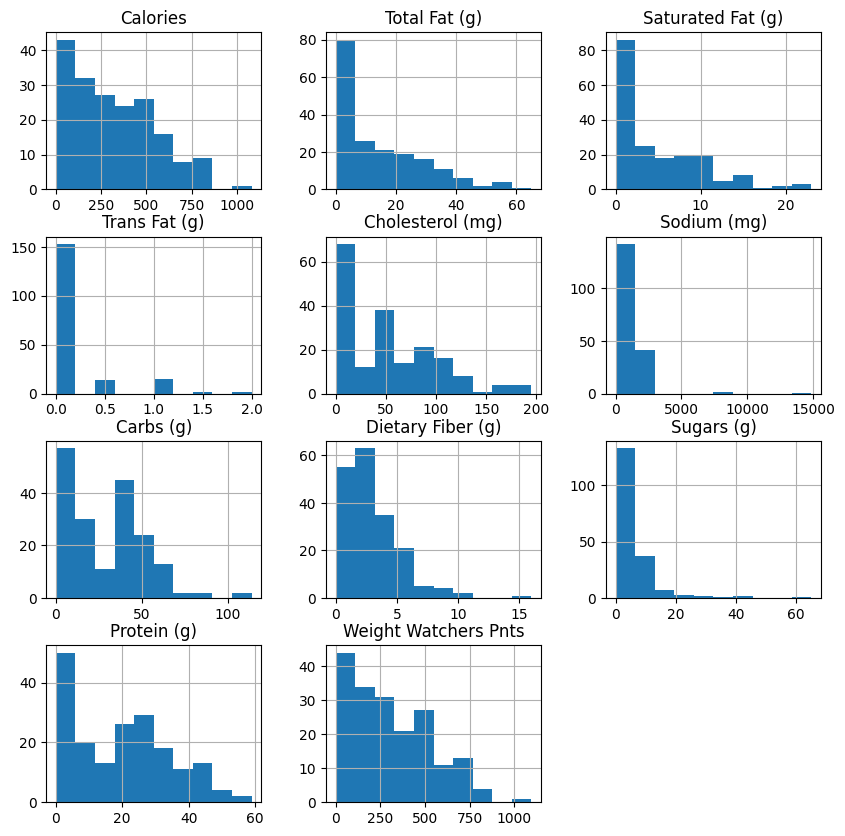

In [19]:
data.hist(figsize=(10,10));

In [14]:
correlation_matrix = data[['Calories', 'Total Fat (g)', 'Sodium (mg)', 'Protein (g)']].corr()
print(correlation_matrix)

               Calories  Total Fat (g)  Sodium (mg)  Protein (g)
Calories       1.000000       0.897577     0.450235     0.827689
Total Fat (g)  0.897577       1.000000     0.397826     0.696522
Sodium (mg)    0.450235       0.397826     1.000000     0.480094
Protein (g)    0.827689       0.696522     0.480094     1.000000


- Correlation is always equal to 1 because the same variables correlate perfectly.
- Positive correlation between calories and total fat (0.897577) and between calories and protein (0.827689) indicates that high-calorie items tend to have more total fat and protein.
- Positive correlation between total fat and protein (0.696522) suggests that high-total fat items also tend to contain more protein. Positive correlations between sodium and calories (0.450235) and sodium and protein (0.480094) also indicate that high-sodium items tend to have more calories and protein.

### Data Type Segregation

These lists can be helpful if want to perform different types of analyses or transformations on each type of column separately.


In [16]:
df_numeric = data.select_dtypes(include=[np.number])
df_categoric = data.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

### Max and Min in Each Column

Lets see which menu items had maximum and minimum in the columns.

In [17]:
def maxAndMinStats(dataframe, cols):
    """Extracting out players with interesting statistics"""
    def maxAndMin(dataf, column):
        return dataf.loc[dataf[column].idxmax()], dataf.loc[dataf[column].idxmin()]

    maxMinList = []

    for col in cols:
        print('Column: ', col)
        res = maxAndMin(dataframe, col)
        max_, min_ = res
        print('Max in ', col, ': ', max_['Item'])
        print('Min in ', col, ': ', min_['Item'], '\n')

        maxMinList.append(res)

    return maxMinList

In [18]:
maxMinStats = maxAndMinStats(data, df_numeric_cols)

Column:  Calories
Max in  Calories :  BBQ Rib Signature Wrap
Min in  Calories :  Banana Peppers 

Column:  Total Fat (g)
Max in  Total Fat (g) :  BBQ Rib Signature Wrap
Min in  Total Fat (g) :  Banana Peppers 

Column:  Saturated Fat (g)
Max in  Saturated Fat (g) :  BBQ Rib Signature Wrap
Min in  Saturated Fat (g) :  Turkey Breast 

Column:  Trans Fat (g)
Max in  Trans Fat (g) :  Meatball Marinara
Min in  Trans Fat (g) :  BBQ Chicken 

Column:  Cholesterol (mg)
Max in  Cholesterol (mg) :  Steak, Egg & Cheese
Min in  Cholesterol (mg) :  Veggie Delite® 

Column:  Sodium (mg)
Max in  Sodium (mg) :  Buffalo Chicken
Min in  Sodium (mg) :  Cucumbers 

Column:  Carbs (g)
Max in  Carbs (g) :  Cripsy Cauliflower Ranch Signature Wrap
Min in  Carbs (g) :  Banana Peppers 

Column:  Dietary Fiber (g)
Max in  Dietary Fiber (g) :  Turkey & Bacon with Avocado Salad
Min in  Dietary Fiber (g) :  American Cheese 

Column:  Sugars (g)
Max in  Sugars (g) :  Coca-Cola®
Min in  Sugars (g) :  American Cheese 

In [21]:
df_categoric.sample(5)

,Category,Item
161,Bread & Toppings,Rosemary & Sea Salt
2,Sandwiches,Black Forest Ham
95,Bowls,Veggie Patty
130,Bread & Toppings,Black Olives
1,Sandwiches,BBQ Rib


### Analyzing How Nutrition Differs Across Menu Categories

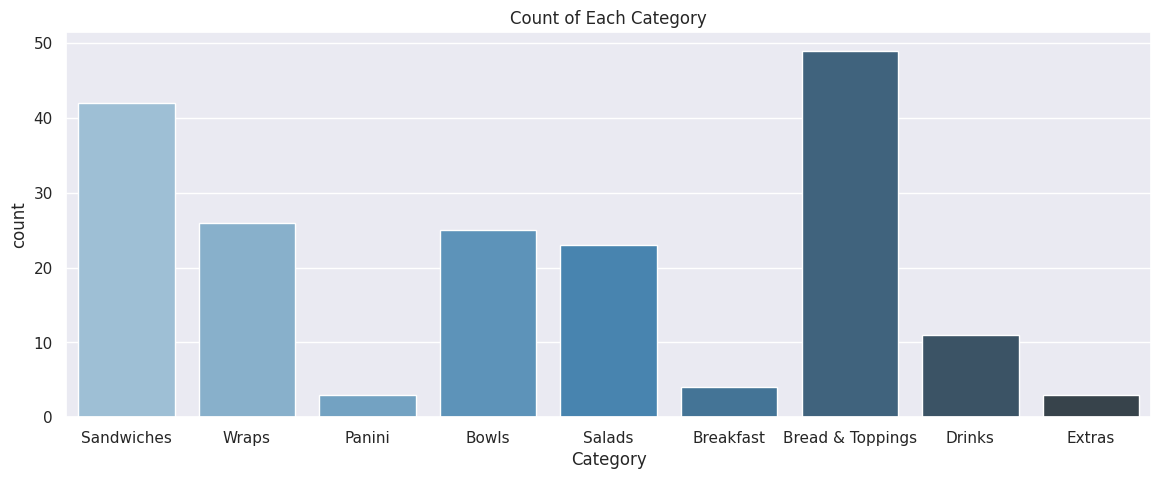

In [22]:
sns.set(rc={'figure.figsize':(14,5)})
sns.countplot(x='Category', data=data, palette="Blues_d").set_title('Count of Each Category');

From the analysis of the graph above:
- The highest values are in the Bread & Toppings, Sandwiches, and Wraps categories because Subway is known for its specialization in offering a variety of customizable sandwiches to cater to customer preferences.
- The lowest values are found in Extras, Panini, and Breakfast. This includes some options in the "Panini" and "Breakfast" categories, possibly because they are not as popular as Subway's main sandwiches.

However, it's important to remember that Subway is known for its menu diversity and allows customers to customize their orders according to their own preferences. The most popular menu choices can vary depending on factors such as geographical region and current trends in a specific location.

### Analyzing High-Calorie Menu Items

<Axes: xlabel='Calories', ylabel='Item'>

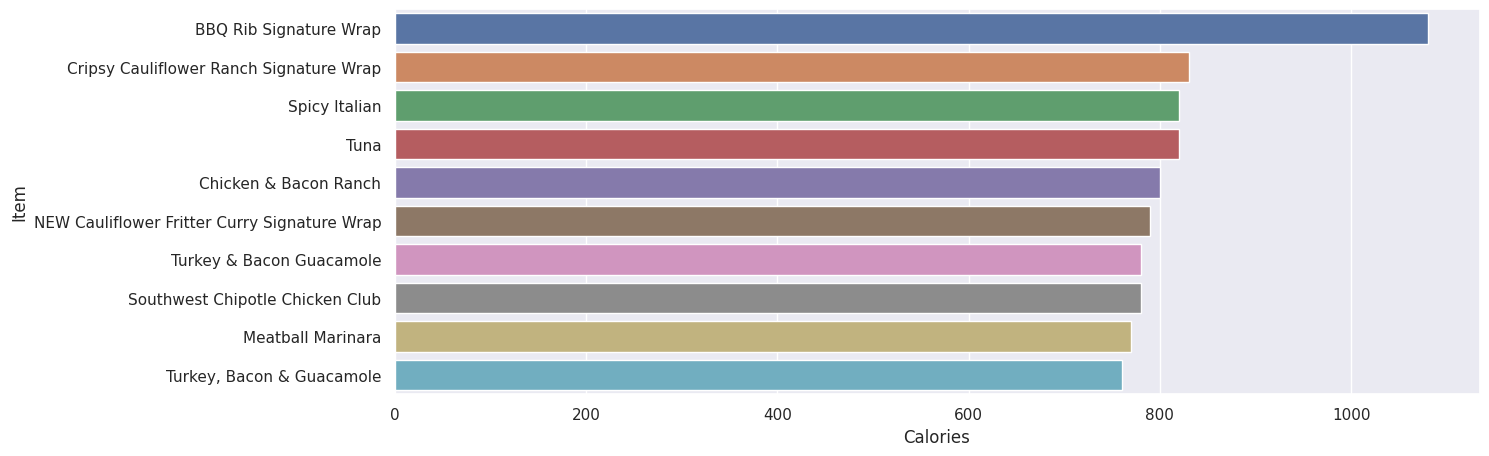

In [23]:
data_calory = data.sort_values(by = ['Calories'], ascending=False)
sns.barplot(y="Item", x="Calories", data = data_calory.head(10))

From the analysis of the graph above:
- The BBQ Rib Signature Wrap has the highest calorie content among the Cripsy Cauliflower Ranch Signature Wrap and Spicy Italian menu items.
- Turkey, Bacon & Guacamole, Meatball Marinara, and Southwest Chipotle Chicken Club have lower calorie content compared to what is shown in the graph.

Since food preferences are highly subjective, and many other factors like taste and texture also influence a buyer's food choices, it's important to consider that calorie content is just one aspect of food selection. Different individuals may have different reasons for choosing specific menu items beyond calorie count.

### Analyzing High-Protein Menu Items

<Axes: xlabel='Protein (g)', ylabel='Item'>

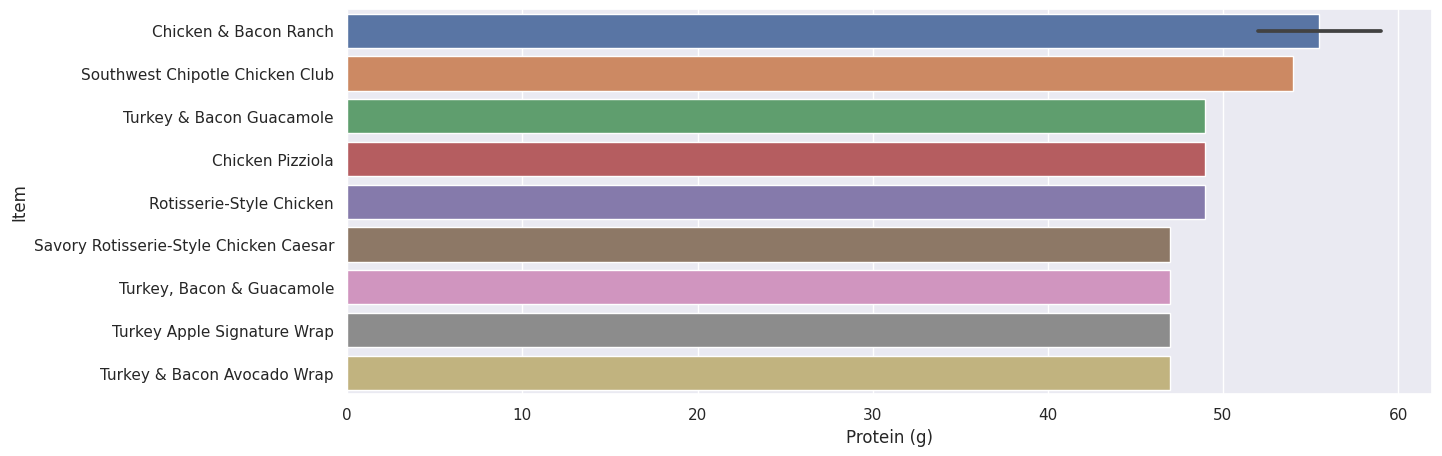

In [24]:
data_Protein = data.sort_values(by = ['Protein (g)'], ascending=False)
sns.barplot(y="Item", x="Protein (g)", data = data_Protein.head(10))

From the analysis of the graph above:
- The menu items "Chicken & Bacon Ranch" and "Southwest Chipotle Chicken Club" have the highest protein content among the items shown in the graph.
- Turkey & Bacon Avocado Wrap have lower protein content compared to what is shown in the graph.

Additionally, protein or calorie content in food menus can be an important consideration for individuals with specific dietary or nutritional needs. Food choices can vary greatly depending on personal preferences and requirements.

### Analyzing High-Total Fat Menu Items

<Axes: xlabel='Total Fat (g)', ylabel='Item'>

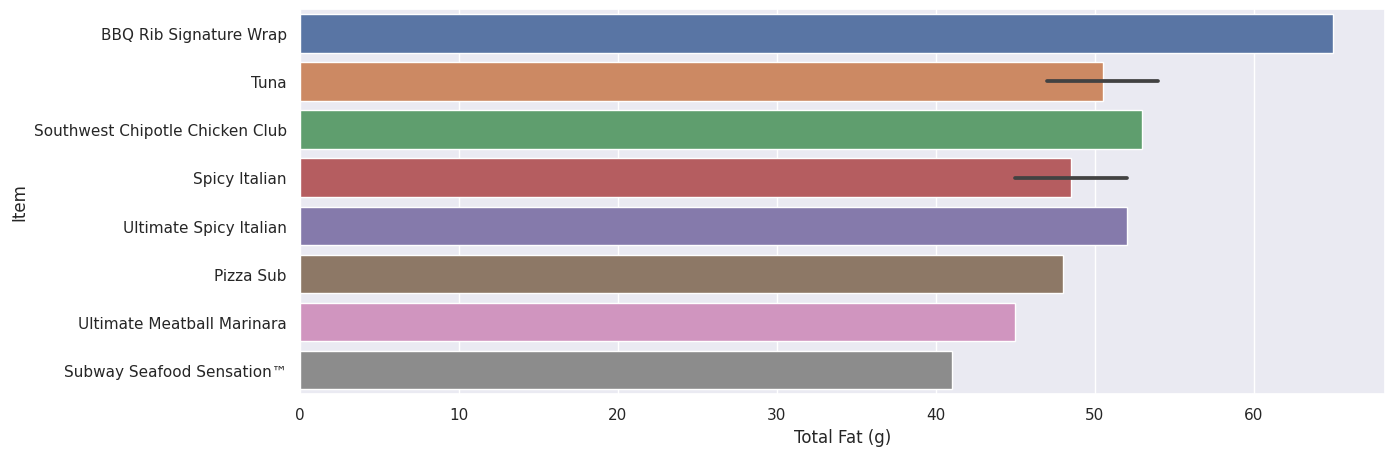

In [25]:
data_Fat = data.sort_values(by = ['Total Fat (g)'], ascending=False)
sns.barplot(y="Item", x="Total Fat (g)", data = data_Fat.head(10))

From the analysis of the graph above:

- The menu items "BBQ Rib Signature Wrap" and "Southwest Chipotle Chicken Club" have the highest total fat content among the items shown in the graph.
- Subway Seafood Sensation have lower total fat content compared to what is shown in the graph.

It's important to remember that the nutritional content of food menus can vary depending on factors such as portion size and the ingredients used. The actual nutritional content in food menus may differ in practice. Individuals with specific dietary preferences or nutritional needs should consider this information when making their menu choices.

### Grouping Menu Items by Category

In [26]:
df_means = data.groupby('Category').agg('mean')
df_means.style.background_gradient(cmap='Blues')

<ipython-input-26-71d0d58015d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_means = data.groupby('Category').agg('mean')


,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Carbs (g),Dietary Fiber (g),Sugars (g),Protein (g),Weight Watchers Pnts
Category,,,,,,,,,,,
Bowls,391.600000,23.040000,8.040000,0.480000,99.200000,1894.400000,15.240000,3.840000,7.240000,32.600000,374.280000
Bread & Toppings,86.428571,3.153061,0.969388,0.000000,4.081633,205.000000,12.061224,0.734694,1.265306,2.979592,85.479592
Breakfast,430.000000,17.250000,5.625000,0.125000,185.000000,1152.500000,47.000000,4.000000,4.000000,24.000000,415.625000
Drinks,77.727273,0.181818,0.090909,0.000000,0.909091,50.000000,19.454545,0.000000,18.545455,0.909091,95.454545
Extras,120.000000,6.333333,2.500000,0.000000,15.000000,201.666667,13.000000,0.000000,9.000000,3.333333,128.166667
Panini,600.000000,25.333333,11.000000,0.166667,71.666667,943.333333,61.000000,3.000000,5.000000,29.666667,586.333333
Salads,280.000000,15.326087,4.717391,0.130435,60.869565,1162.391304,16.000000,5.260870,8.000000,21.913043,270.804348
Sandwiches,400.238095,16.738095,5.630952,0.190476,54.404762,1152.619048,40.571429,3.285714,6.571429,23.190476,389.250000
Wraps,649.230769,28.615385,9.596154,0.192308,84.230769,1925.769231,63.500000,4.346154,6.384615,35.769231,629.442308


So:

Wraps menu has most Protein, Calories, Total Fat, Sodium, and Carbs content.

Breakfast menu has most Cholesterol content.

Beverage Menu has lots of sugar.

## Recommendations

- Promote Healthy Menu Options: Subway can promote low-calorie, low-fat, and high-protein menu choices as healthy options to customers. This will assist customers who are looking to manage their calorie intake or pay attention to specific nutrition.
- Low-Sugar Beverage Options: If the beverage menu contains high sugar content, Subway can explore ways to offer low-sugar beverage options or provide alternatives with lower sugar content.
- Nutrition-Based Menu Selection: Subway can provide clearer and easily accessible nutrition information to customers, enabling them to make menu choices that align with their dietary needs.
- Ongoing Monitoring and Improvement: Subway can continue to monitor and improve the nutritional composition of their menu to meet customer needs and preferences.